In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data1 = pd.read_csv('hire2FTE.csv')
data1.head()

,Transactions,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Received,160,170,240,140,175,155,130,200,160,140,150,175
1,Processed,160,170,240,140,175,150,125,170,135,130,125,150


In [6]:
received = data1.loc[0, 'Jan':'Dec']
processed = data1.loc[1, 'Jan':'Dec']

In [7]:
transactions = data1.melt(id_vars='Transactions', var_name='Month')
transactions.head()

,Transactions,Month,value
0,Received,Jan,160
1,Processed,Jan,160
2,Received,Feb,170
3,Processed,Feb,170
4,Received,Mar,240


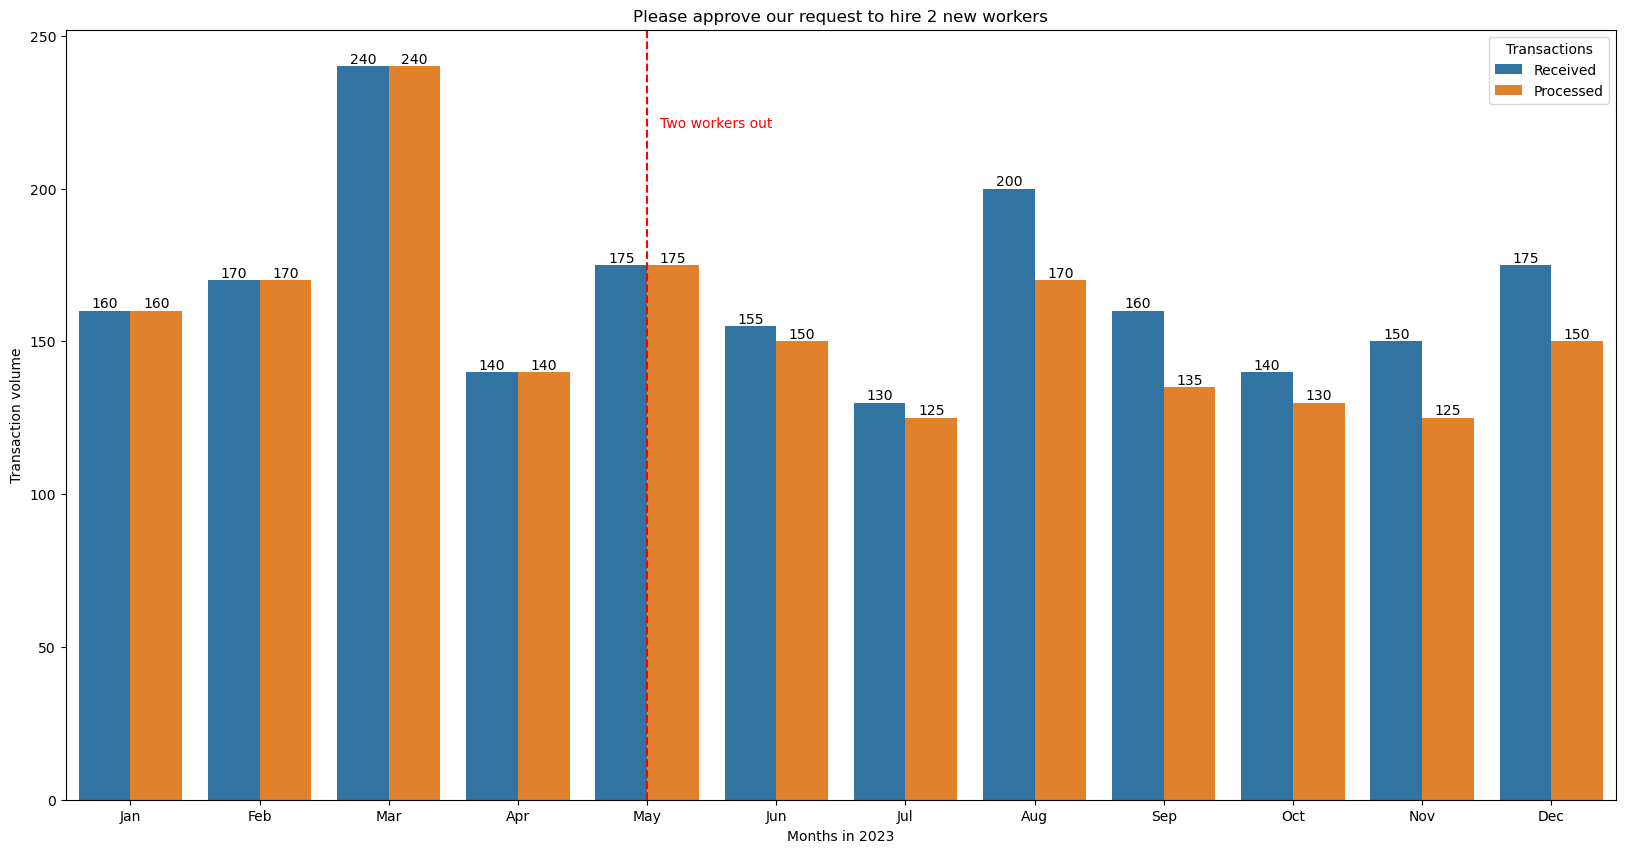

In [8]:
f, axes = plt.subplots(figsize=(20, 10))
bar = sns.barplot(data=transactions,
                   x='Month',
                   y='value',
                   hue='Transactions')
bar.set(title='Please approve our request to hire 2 new workers',
        xlabel='Months in 2023',
        ylabel='Transaction volume')
plt.axvline(x=4, linestyle='--', color='red')
plt.text(x=4.1, y=220, s='Two workers out', color='red')
for i in bar.containers:
    bar.bar_label(i,)

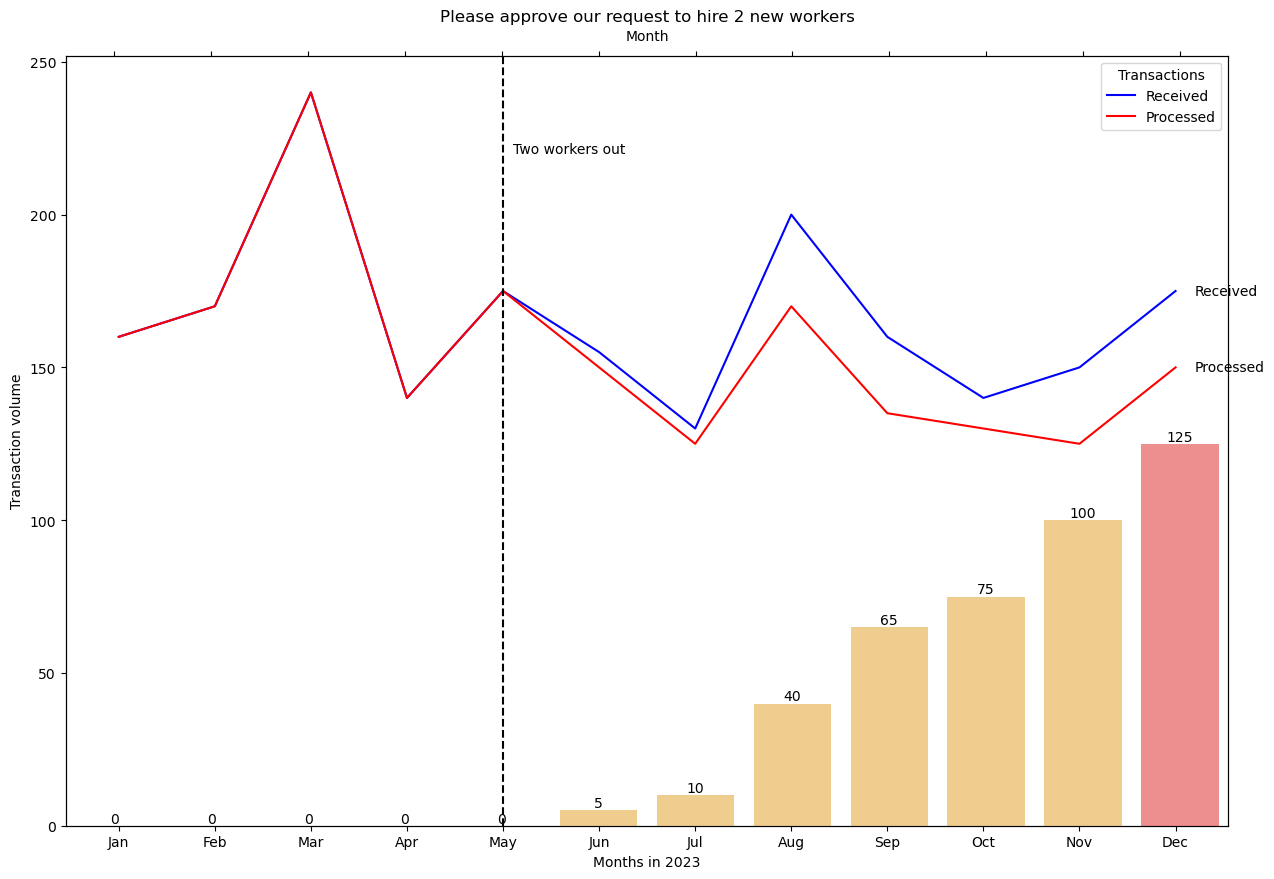

In [70]:
f, axes = plt.subplots(figsize=(15, 10), sharey=True)

line = sns.lineplot(data=transactions,
                   x='Month',
                   y='value',
                   hue='Transactions',
                   palette=['b', 'r'])
line.tick_params(right=False, top=False)

line.set(title='Please approve our request to hire 2 new workers',
        xlabel='Months in 2023',
        ylabel='Transaction volume')
plt.axvline(x=4, linestyle='--', color='black')
plt.text(x=4.1, y=220, s='Two workers out', color='black')

last_values = transactions[['Transactions', 'value']][transactions['Month'] == 'Dec']
for transaction_type, value in last_values.itertuples(index=False):
    plt.text(x=11.2, y=value, s=transaction_type, va="center")
    
diff = pd.DataFrame(received - processed).reset_index()
diff = diff.rename({'index': 'Month', 0: 'value'}, axis=1)
diff['total'] = diff['value'].rolling(min_periods=1, window=12).sum()
clrs = ['orange' if (x < max(diff['total'])) else 'red' for x in diff['total'] ]
ax2 = axes.twiny()
diff_bar = sns.barplot(data=diff,
                       x='Month',
                       y='total',
                       alpha=0.5,
                       palette=clrs,
                       ax=ax2)

ax2.set_xticklabels([])
for i in diff_bar.containers:
    diff_bar.bar_label(i,)
plt.show()